# Example of usage in Jupyter notebook

## Usual imports for pandas/numpy/matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Imports and environment set up for API

In [2]:
from ethereum_stats import levelDB, statedataset, blockrange
from eth_utils import decode_hex
import logging
import time

LOGGING_LEVEL = logging.WARNING
logging.basicConfig(level=LOGGING_LEVEL)

DB_DIR = '/home/ethereum/eth-rinkeby/geth/chaindata'
db = levelDB.LevelDB(DB_DIR)

## Get the last block header and its state

In [3]:
last_block = blockrange.BlockHeader.get_latest_block_header(db)
state = statedataset.StateDataset(db, decode_hex(last_block.state_root))
df = state.to_panda_dataframe()


In [4]:
df.describe()


,nonce,balance,code_size,storage_size
count,697779.000000,6.977790e+05,697779.000000,697779.000000
mean,4.742788,1.296436e+69,962.792269,3.699901
std,501.292151,1.082954e+72,2835.491628,151.992746
min,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000e+00,1.000000,0.000000
50%,1.000000,0.000000e+00,10.000000,0.000000
75%,1.000000,1.000000e+00,319.000000,0.000000
max,270346.000000,9.046257e+74,24576.000000,51322.000000


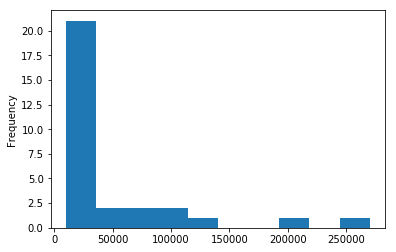

In [50]:
df[df.nonce>10000]['nonce'].plot.hist()



In [46]:
df[df.is_contract==True].describe()


,nonce,balance,code_size,storage_size
count,568836.000000,5.688360e+05,568836.000000,568836.000000
mean,1.772488,3.436129e+16,1181.036761,4.538589
std,358.814161,1.728200e+18,3099.154777,168.329089
min,1.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000e+00,10.000000,0.000000
50%,1.000000,0.000000e+00,10.000000,0.000000
75%,1.000000,0.000000e+00,731.000000,1.000000
max,270346.000000,8.515625e+20,24576.000000,51322.000000


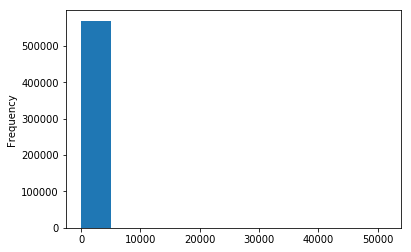

In [57]:
s = df[df.is_contract==True].reset_index().storage_size

s.plot.hist()

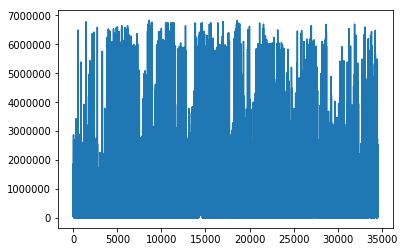

In [85]:
aRange = blockrange.BlockRange.date_range(db, '1/1/2018', '7/1/2018')
s = pd.Series(np.zeros(aRange.upper_blk_nbr - aRange.lower_blk_nbr + 1))
i = 0
for blk in aRange:
    s[i] = blk.gas_used
    i = i + 1 
s.plot()

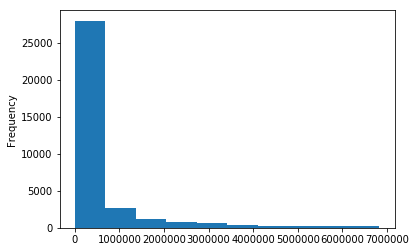

In [86]:
s.plot.hist()

In [64]:
df.nonce.idxmax()

'0x7a10df710851ec8e6de03bc988eb997d52c4d68e'

In [68]:
df.loc[df.nonce.idxmax()]

account         0x7a10df710851ec8e6de03bc988eb997d52c4d68e
nonce                                               270346
balance                                                  0
is_contract                                           True
code_size                                              811
storage_size                                          3612
key_in_db                                            False
Name: 0x7a10df710851ec8e6de03bc988eb997d52c4d68e, dtype: object

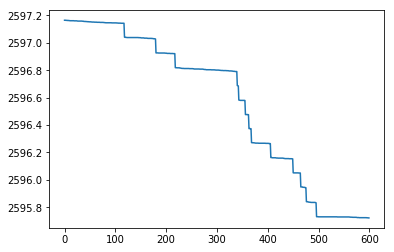

In [82]:
factor = 10 ** 18
accAddress = df.loc[df[df.key_in_db==True].nonce.idxmax()].account
aRange= blockrange.BlockRange.date_range(db, '7/1/2018 15:30:00', '7/1/2018 18:00:00')
s = pd.Series(np.zeros(aRange.upper_blk_nbr - aRange.lower_blk_nbr + 1))
i = 0
for blk in aRange:
    st = statedataset.StateDataset(db, decode_hex(blk.state_root))
    acc = st.get_account(accAddress)
    s[i] = acc.balance / factor
    i = i + 1 
s.plot()